In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

In [2]:
data=pd.read_csv('data/02_medical_records.csv')

In [3]:
new_data = data.copy()
new_data.drop('cv_issue', axis=1, inplace=True)
new_data.head()

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


## **Basic Overview**

#### Display the first few rows of the dataset and general information to understand its structure

In [4]:
print(data.head())
print(data.info())

   age gender chest_pain  resting_BP  cholesterol  fasting_BS resting_ECG  \
0   40      M        ATA         140          289           0      Normal   
1   49      F        NAP         160          180           0      Normal   
2   37      M        ATA         130          283           0          ST   
3   48      F        ASY         138          214           0      Normal   
4   54      M        NAP         150          195           0      Normal   

   max_HR exercise_angina  old_peak ST_slope  cv_issue  
0     172               N       0.0       Up         0  
1     156               N       1.0     Flat         1  
2      98               N       0.0       Up         0  
3     108               Y       1.5     Flat         1  
4     122               N       0.0       Up         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  ----- 

## **Check value counts of variable**

to help know the types of encoding required further down the code

In [5]:
for column in data.columns:
    print(f"Value counts for column '{column}':")
    print(data[column].value_counts())
    print("\n")

Value counts for column 'age':
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: age, dtype: int64


Value counts for column 'gender':
M    725
F    193
Name: gender, dtype: int64


Value counts for column 'chest_pain':
ASY    496
NAP    203
ATA    173
TA      46
Name: chest_pain, dtype: int64


Value counts for column 'resting_BP':
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: resting_BP, Length: 67, dtype: int64


Value counts for column 'cholesterol':
0      172
254     11
223     10
220     10
230      9

#### **Generate visualizations to understand the distribution of individual variables.**

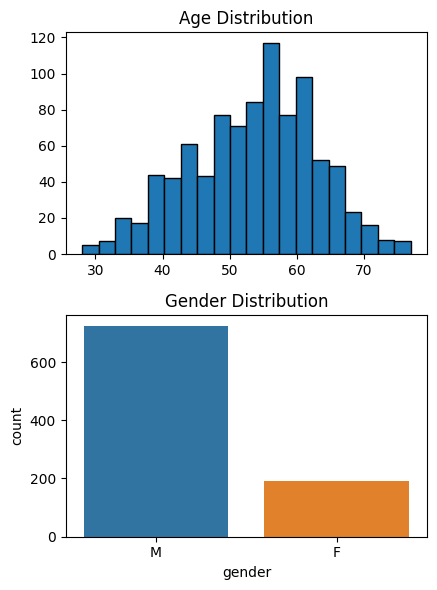

In [6]:
# Histograms for numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.hist(data['age'], bins=20, edgecolor='k')
plt.title('Age Distribution')

# Repeat for other numerical variables

# Count plots for categorical variables
plt.subplot(2, 3, 4)
sns.countplot(data=data, x='gender')
plt.title('Gender Distribution')

# Repeat for other categorical variables

plt.tight_layout()
plt.show()


#### **Explore relationships between variables using scatter plots, box plots, etc.**

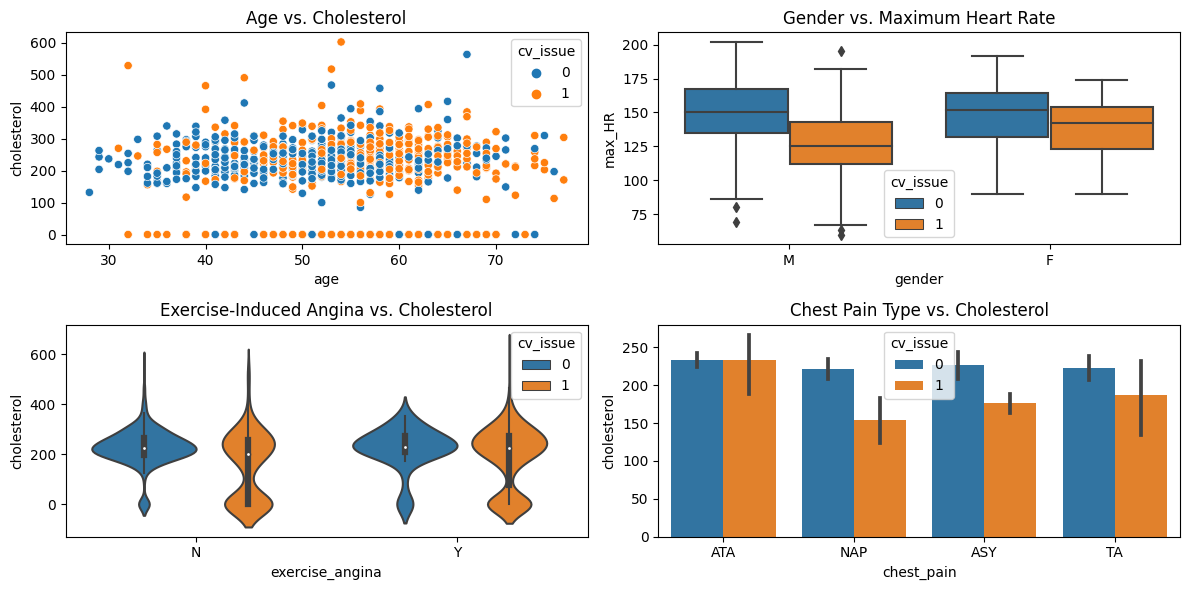

In [7]:
# Scatter plot of age vs. cholesterol
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='age', y='cholesterol', hue='cv_issue')
plt.title('Age vs. Cholesterol')

# Box plot of gender vs. maximum heart rate
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='gender', y='max_HR', hue='cv_issue')
plt.title('Gender vs. Maximum Heart Rate')

# Violin plot of exercise-induced angina vs. cholesterol
plt.subplot(2, 2, 3)
sns.violinplot(data=data, x='exercise_angina', y='cholesterol', hue='cv_issue')
plt.title('Exercise-Induced Angina vs. Cholesterol')

# Bar plot of chest pain type vs. cholesterol
plt.subplot(2, 2, 4)
sns.barplot(data=data, x='chest_pain', y='cholesterol', hue='cv_issue')
plt.title('Chest Pain Type vs. Cholesterol')

plt.tight_layout()
plt.show()


## **Correlation Analysis**

#### Examine the correlation between numerical variables using a heatmap.


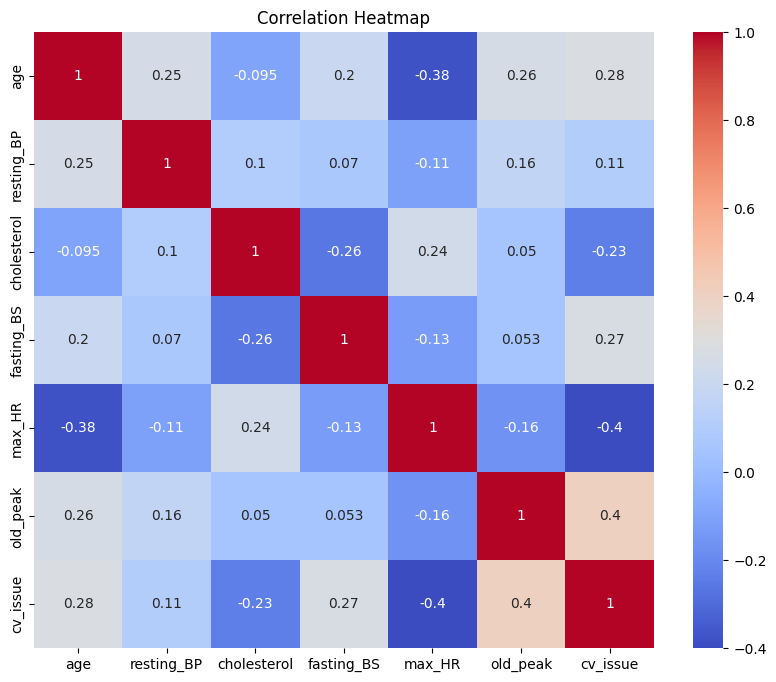

In [8]:
corr_matrix = data.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Age seems to have a moderate positive correlation with cholesterol levels.
- Gender does not seem to have a significant impact on maximum heart rate.
- There is a notable difference in cholesterol levels between patients with and without cardiovascular issues.

## Set Up models

In [9]:
from pycaret.classification import *

In [10]:
# init setup on exp
data = setup(data = data, target = 'cv_issue', log_experiment = True, experiment_name = 'cv_issue', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cv_issue
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(918, 19)"
5,Transformed train set shape,"(642, 19)"
6,Transformed test set shape,"(276, 19)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,5


2023/08/21 01:33:19 INFO mlflow.tracking.fluent: Experiment with name 'cv_issue' does not exist. Creating a new experiment.


## Compare Models

In [11]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8879,0.9284,0.9182,0.8864,0.9011,0.7718,0.7744,3.8040
ridge,Ridge Classifier,0.8661,0.0000,0.9014,0.8657,0.8817,0.7275,0.7316,3.6160
lda,Linear Discriminant Analysis,0.8661,0.9270,0.9014,0.8657,0.8817,0.7275,0.7316,3.3220
lr,Logistic Regression,0.8645,0.9268,0.9013,0.8642,0.8808,0.7240,0.7282,5.2020
gbc,Gradient Boosting Classifier,0.8614,0.9154,0.8846,0.8728,0.8764,0.7186,0.7231,3.8130
lightgbm,Light Gradient Boosting Machine,0.8614,0.9128,0.8902,0.8675,0.8768,0.7185,0.7232,4.3030
rf,Random Forest Classifier,0.8599,0.9171,0.8790,0.8713,0.8743,0.7161,0.7179,3.5110
nb,Naive Bayes,0.8505,0.9153,0.8789,0.8575,0.8668,0.6964,0.6991,3.5870
et,Extra Trees Classifier,0.8443,0.9106,0.8646,0.8575,0.8598,0.6846,0.6871,3.7340
xgboost,Extreme Gradient Boosting,0.8443,0.9082,0.8817,0.8461,0.8619,0.6835,0.6876,3.6110


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## Analyze best model

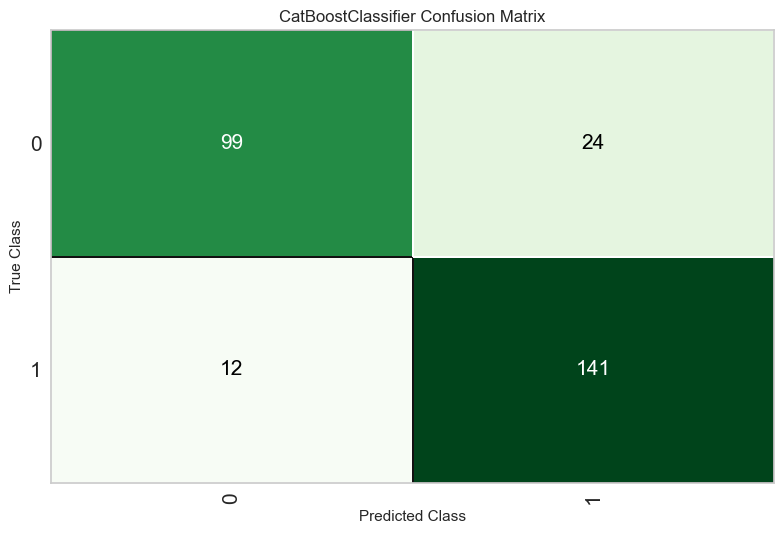

In [12]:
plot_model(best, plot = 'confusion_matrix')

confusion matrix tells us that the model seems to be able to predict the true positive and true negative very accurately, 
with only 18 false positive and false negative 

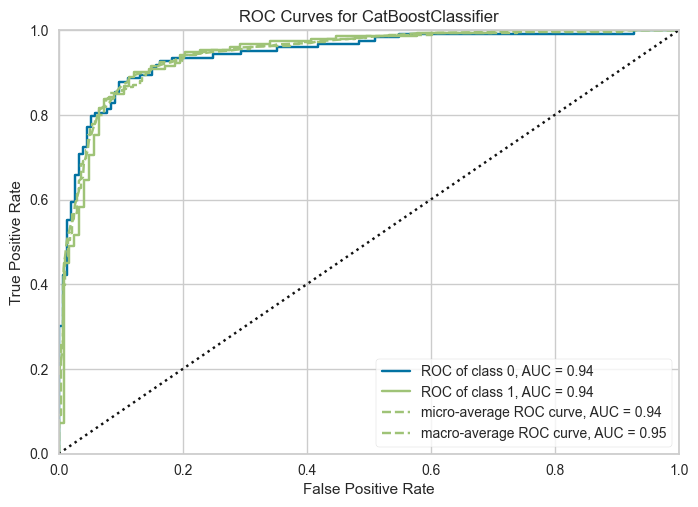

In [13]:
plot_model(best, plot = 'auc')

The ROC shows the trade off between True positive rate and false positive rate. Showing a 93% accuracy rate

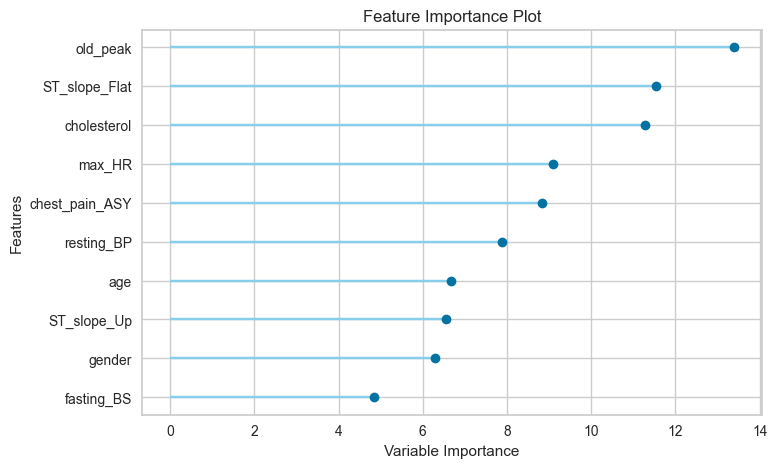

In [14]:
plot_model(best, plot = 'feature')

shows the variable importance of what affects the model, and from here, the top 3 is cholesterol, ST_slop_up and old_peak.

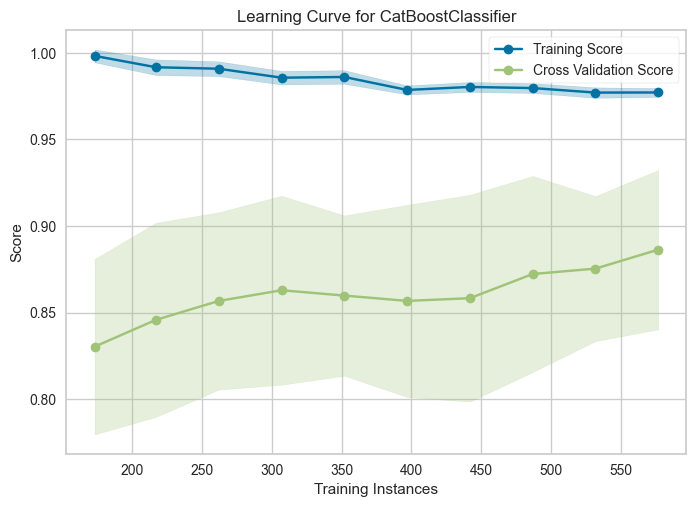

In [15]:
plot_model(best, plot = 'learning')

The training loss indicates how well the model is fitting the training data, while the validation loss indicates how well the model fits new data

## Predict Model 

In [16]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8696,0.9429,0.9216,0.8545,0.8868,0.7335,0.7364


In [17]:
holdout_pred.head()

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,cv_issue,prediction_label,prediction_score
633,64,M,TA,110,211,0,LVH,144,Y,1.8,Flat,0,1,0.5141
884,67,M,ASY,160,286,0,LVH,108,Y,1.5,Flat,1,1,0.9849
60,49,M,ATA,100,253,0,Normal,174,N,0.0,Up,0,0,0.9696
219,29,M,ATA,140,263,0,Normal,170,N,0.0,Up,0,0,0.9880
143,53,M,ASY,140,243,0,Normal,155,N,0.0,Up,0,0,0.7989


In [18]:
predictions = predict_model(best, data = new_data)
predictions.head()

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,prediction_label,prediction_score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.9904
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,0,0.7861
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.9791
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.8659
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.9740


## **Save Model**

In [19]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'cv_issue-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\ulyss\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'resting_BP', 'cholesterol',
                                              'fasting_BS', 'max_HR',
                                              'old_peak'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               ver...
                  TransformerWrapper(exclude=None,
       

In [20]:
# save_model(best, 'my_first_pipeline')

In [21]:
# loaded_best_pipeline = load_model('my_first_pipeline')
# loaded_best_pipeline

In [32]:
pipeline = load_model("mlruns/2/8deec9957f874038b8798141e73620dc/artifacts/model/model")

Transformation Pipeline and Model Successfully Loaded


In [33]:
print(pipeline)

Pipeline(memory=FastMemory(location=C:\Users\ulyss\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'resting_BP', 'cholesterol',
                                             'fasting_BS', 'max_HR',
                                             'old_peak'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              ver...
                 TransformerWrapper(exclude=None,
                     

In [29]:
predictions = predict_model(pipeline, data= new_data)
predictions.head()

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,prediction_label,prediction_score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.9904
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,0,0.7861
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.9791
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.8659
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.9740


In [30]:
print(new_data.columns)


Index(['age', 'gender', 'chest_pain', 'resting_BP', 'cholesterol',
       'fasting_BS', 'resting_ECG', 'max_HR', 'exercise_angina', 'old_peak',
       'ST_slope'],
      dtype='object')
